In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math
import cv2

In [19]:
def lidar_map(fname):
    #read text file
    numbers = []
    for line in open(fname):
        data = line.split()
        numbers.append(int(data[0]))
    
    #to uniquley name every graph when function runs for different 
    tag = fname[0:-4]# to remove the '.txt' portion

    #calculate averages of every 20 values for each degree ( of total 180 degrees)
    average_vals = []
    start = 0
    while start<3601:
        addn = 0
        for no in numbers[start:start+20]:
            addn = addn + no
        average_vals.append(float(addn)/20.0)
        start = start + 20
    
    #calculate x and y values
    x_vals = []
    y_vals = []
    thetha = 0.0
    for r in average_vals:
        x_vals.append(r*math.cos(thetha))
        y_vals.append(r*math.sin(thetha))
        thetha = thetha + math.pi/180.00
    
    #to save image with axes where ROBOT is @ ORIGIN
    img = plt.plot(x_vals,y_vals, 'k.')
    plt.savefig(tag + "graph_w_axes.png")

    #TO SAVE IMAGE WITHOUT AXES -----
    img = plt.plot(x_vals,y_vals, 'k.')
    plt.axis('off')
    plt.savefig(tag + "graph.png", bbox_inches='tight')

In [20]:
def houghline(name_of_img):
#method 2 MOD ------- probabailistic hough line transform ( SEE LINK BELOW )

    img = cv2.imread(name_of_img)
    #converting to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #doing edge detection below
    edges = cv2.Canny(gray, 100, 200)
    #command to print the canny edge detected pic
    cv2.imwrite(name_of_img[0:-4] + "__edgepic.png", edges)
    # NOTE :--- name_of_img[0:-4] will give name of the image without the .png(4 chars) at its end
    
    #see expln of params for below @ 
    #http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html
    lines = cv2.HoughLinesP(edges, 1, math.pi/180.0, 70, None, 70, 40); #for 181 pts - (70,None,70,40)#

    for l in lines:
        for x1,y1,x2,y2 in l:
            pt1 = (x1,y1)
            pt2 = (x2,y2)
            cv2.line(img, pt1, pt2, (0,0,255))
    #now equation of lines can be known because we have 2 points ( pt1, pt2 )
    cv2.imwrite(name_of_img[0:-4] + "__houghlines_2.png", img)

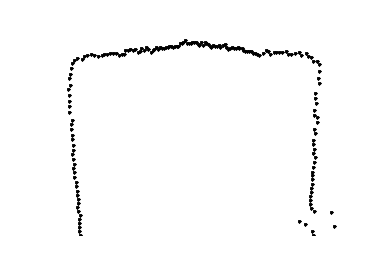

In [21]:
lidar_map('LOG00035.txt')
houghline("LOG00035graph.png")

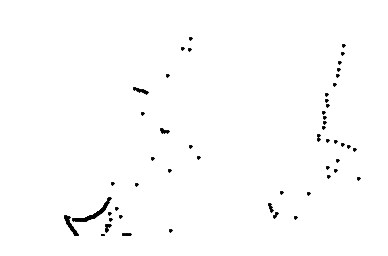

In [47]:
lidar_map('LOG00048.txt')

In [48]:
def houghcircle(name_of_img):
#HOUGH CIRCLE TRANSFORM --- 
#http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_houghcircles/py_houghcircles.html

    img = cv2.imread(name_of_img,0)
    #Blurring the image
    img = cv2.medianBlur(img,5)
    #converting to grayscale
    cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    #now hough circle transform
    circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,2,circles = 1,param1=15,param2=15,minRadius=0,maxRadius=500)

    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
        # draw the center of the circle
        cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

    cv2.imwrite(name_of_img[0:-4] + "__HoughCircles.png",cimg)

houghcircle("LOG00048graph_c.png")#works at above params, vary params to get for various images

In [ ]:
#BLURRING/FUZZING THE IMAGE
#different types of blurring (can be seen at below link)
#http://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html
img = cv2.imread('LOG00035graph.png',0)

#median blur
img1 = cv2.medianBlur(img,5)
cv2.imwrite("median_blur.png",img1)
#gaussian blur
img2 = cv2.GaussianBlur(img,(5,5),0)
cv2.imwrite("gauss_blur.png",img2)
#bilateral blur
img3 = cv2.bilateralFilter(img,9,75,75)
cv2.imwrite("bi_lat_blur.png",img3)